In [1]:
import torch
import numpy as np
import sklearn
from sklearn import datasets, neighbors
from matplotlib import pyplot as plt

from KNNClassifier import KNNClassifier
import Metrics
from KMeans import KMeans

### Define parameters and create the dataset

In [2]:
train_samples, test_samples = 500, 200
noise = 0.2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


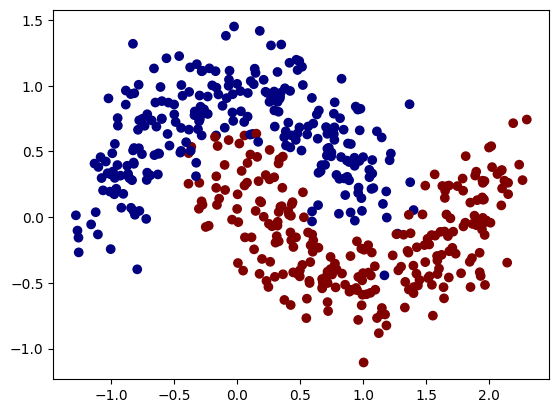

In [3]:
X_train, y_train = datasets.make_moons(n_samples=train_samples, noise=noise, random_state=0)
X_train, y_train = torch.tensor(X_train, dtype=torch.float32, device=device), torch.tensor(y_train, device=device)
X_test, y_test = datasets.make_moons(n_samples=test_samples, noise=noise, random_state=1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32, device=device), torch.tensor(y_test, device=device)

# Visualize the training set
plt.scatter(X_train[:, 0].cpu(), X_train[:, 1].cpu(), c=y_train.cpu(), cmap='jet')
plt.show()

### Initialize the KNNClassifier and predict the classes of the test samples

In [4]:
D = KNNClassifier.getD(X_train, y_train).to(device)

n_neighbors = 5
n_clusters = 25
kmeans = KMeans(n_clusters=n_clusters) 
knn = KNNClassifier(n_neighbors=n_neighbors, metric=Metrics.MahalanobisMetric(shrinkage=True, normalization=True),
                     is_normalization=False, kmeans=kmeans, device=device).fit(D)
pred = knn.predict(X_test.to(device))
print('accuracy: ', knn.accuracy_score(y_test.to(device), pred))

accuracy:  95.5


### Plot the decision boundary

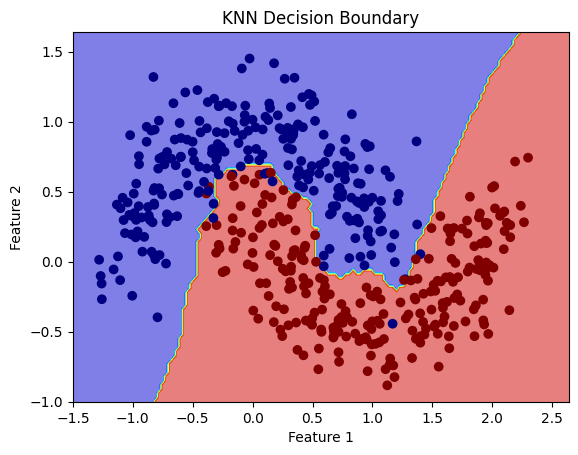

In [5]:
xx, yy = np.meshgrid(np.arange(-1.5, 2.65, 0.03), np.arange(-1, 1.65, 0.03))
pred_grid = knn.predict(torch.tensor(np.stack([xx.flatten(), yy.flatten()], axis=-1), dtype=torch.float32, 
                                     device=device)).cpu()

plt.contourf(xx, yy, pred_grid.reshape(xx.shape), alpha=0.5, cmap='jet')
plt.scatter(X_train[:, 0].cpu(), X_train[:, 1].cpu(), c=y_train.cpu(), cmap='jet')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()

### Compare with sklearn

In [6]:
n_neighbors = 5
knn2 = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', algorithm='brute',
                                              metric='euclidean', n_jobs=-1).fit(X_train.cpu(), y_train.cpu())
pred2 = knn2.predict(X_test.cpu())
print('accuracy: ', sklearn.metrics.accuracy_score(y_test.cpu(), pred2) * 100)

accuracy:  97.0


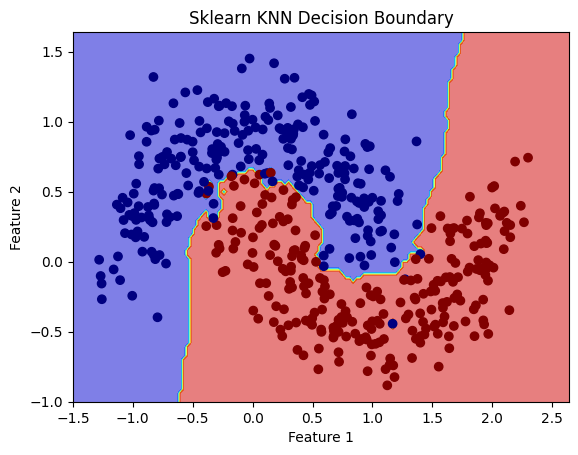

In [8]:
xx, yy = np.meshgrid(np.arange(-1.5, 2.65, 0.03), np.arange(-1, 1.65, 0.03))
pred_grid = knn2.predict(torch.tensor(np.stack([xx.flatten(), yy.flatten()], axis=-1), dtype=torch.float32, 
                                     device=device).cpu())

plt.contourf(xx, yy, pred_grid.reshape(xx.shape), alpha=0.5, cmap='jet')
plt.scatter(X_train[:, 0].cpu(), X_train[:, 1].cpu(), c=y_train.cpu(), cmap='jet')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sklearn KNN Decision Boundary')
plt.show()